## Uji Hipotesis - Model Prediksi BTC-USD 

In [1]:
# lib statistic 
import scipy.stats as sc

# lib manipulation dataset
import pandas as pd
import numpy as np

# lib data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# lib min-max scaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
# load dataset
dataset = pd.read_excel("dataset/hasil_penelitian.xlsx", sheet_name="hasil evaluasi windows")
np.round(dataset.tail(),3)

,LSTM-R,LSTM-MAE,LSTM-RMSE,LSTM-MAPE,LSTM-TIME,GRU-R,GRU-MAE,GRU-RMSE,GRU-MAPE,GRU-TIME
25,0.996,998.54,1389.89,0.033,206.71,0.998,745.23,1138.93,0.022,182.44
26,0.996,927.54,1492.65,0.026,212.06,0.998,655.64,1057.58,0.020,187.18
27,0.997,1103.58,1731.08,0.031,200.93,0.998,742.61,1135.24,0.022,175.36
28,0.996,1053.37,1506.68,0.034,201.54,0.998,959.82,1430.14,0.027,179.48
29,0.996,1153.48,1703.01,0.035,215.59,0.997,901.25,1218.17,0.030,186.33


### Hypothesis Test of Non-parametric

In [3]:
def boxplot(data, min, max, title):

  # create boxplot
  fig, ax = plt.subplots(figsize=(8,4))
  sns.boxplot(data=data)

  # set labels
  ax.set_title(title)
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_ylim(min,max)
  ax.grid(True)

  # show boxplot
  plt.show()

In [4]:
# Hipotesa Awal
# H0 = Data terdistribusi normal
# H1 = Data tidak terdistribusi normal

# Interpretasi hasil:
# Terima HO = p-value > 0.05 
# Terima H1 = p-value < 0.05 

# func normality test
def normality(lstm, gru):
  
  print("Hasil Uji-Shapiro-Wilk")
  print("----------------------")

  # normality test
  if sc.shapiro(lstm).pvalue > 0.05:
    print("Terima H0 = data terdistribusi normal")
  else:
    print("Terima H1 = data tidak terdistribusi normal")
  print("LSTM. p-value",sc.shapiro(lstm).pvalue)
  print("")

  # normality test
  if sc.shapiro(gru).pvalue > 0.05:
    print("Terima H0 = data terdistribusi normal")
  else:
    print("Terima H1 = data tidak terdistribusi normal")
  print("GRU. p-value",sc.shapiro(gru).pvalue)
  print("")

  # ---------------------------------------------------------------

  print("Hasil Uji-Anderson-Darling ")
  print("----------------------")

  # normality test
  if sc.anderson(lstm).statistic > 0.05:
    print("Terima H0 = data terdistribusi normal")
  else:
    print("Terima H1 = data tidak terdistribusi normal")
  print("LSTM. p-value",sc.anderson(lstm).statistic)
  print("")

  # normality test
  if sc.anderson(gru).statistic > 0.05:
    print("Terima H0 = data terdistribusi normal")
  else:
    print("Terima H1 = data tidak terdistribusi normal")
  print("GRU. p-value",sc.anderson(gru).statistic)
  print("")

In [5]:
# Hipotesa Awal
# H0 = Tidak ada perbedaan kinerja antara LSTM dan GRU.
# H1 = Ada perbedaan kinerja antara LSTM dan GRU.

# Interpretasi hasil:
# Terima HO = p-value > 0.05 
# Terima H1 = p-value < 0.05 

# func hypothesis test
def hypothesis(lstm, gru):
  
  # hitung uji t independent
  hasil = sc.ttest_ind(lstm, gru).pvalue
  
  # hasil uji t independent
  if hasil > 0.05:
    print("H0 = Tidak ada perbedaan kinerja antara LSTM dan GRU")
  else:
    print("H1 = Ada perbedaan kinerja antara LSTM dan GRU")
  print("p-value", hasil)

In [6]:
# func hypothesis test
def hypothesis_nonparametrik(lstm, gru):
  
  # Mann-Whitney Test
  Mann_Whitney = np.round(sc.mannwhitneyu(lstm, gru).pvalue,4)

  # Intrepetasi hasil
  print("Mann_Whitney")
  if Mann_Whitney > 0.05:
    print("Karena p-value:",Mann_Whitney,"maka Terima H0")
  else :
    print("Karena p-value:",Mann_Whitney,"maka Terima H1")
  print("")
  # --------------------------------------------------------------
  
  # Wilcoxon Rank Test
  Wilcoxon = np.round(sc.wilcoxon(lstm, gru).pvalue,4)

  # Intrepetasi hasil
  print("Wilcoxon Rank Test")
  if Wilcoxon > 0.05:
    print("Karena p-value:",Wilcoxon,"maka Terima H0")
  else :
    print("Karena p-value:",Wilcoxon,"maka Terima H1")
  print("")
  # --------------------------------------------------------------

  # Kruskal-Wallis Test
  Kruskal_Wallis = np.round(sc.kruskal(lstm, gru).pvalue,4)

  # Intrepetasi hasil
  print("Kruskal-Wallis Test")
  if Kruskal_Wallis > 0.05:
    print("Karena p-value:",Kruskal_Wallis,"maka Terima H0")
  else :
    print("Karena p-value:",Kruskal_Wallis,"maka Terima H1")
  print("")
  # --------------------------------------------------------------

### Hypothesis Test for R Values

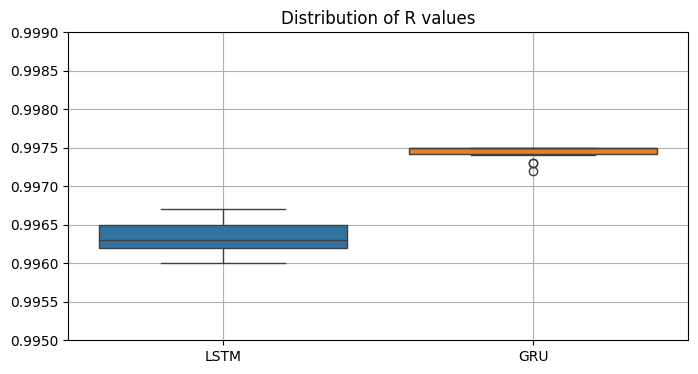

In [7]:
df = dataset[["LSTM-R", "GRU-R"]]
df.columns = ["LSTM", "GRU"]
boxplot(
  data=df, min=0.9950, max=0.999,
  title="Distribution of R values")

In [8]:
normality(dataset["LSTM-R"], dataset["GRU-R"])

Hasil Uji-Shapiro-Wilk
----------------------
Terima H0 = data terdistribusi normal
LSTM. p-value 0.14993587207476772

Terima H1 = data tidak terdistribusi normal
GRU. p-value 5.6035222393649744e-08

Hasil Uji-Anderson-Darling 
----------------------
Terima H0 = data terdistribusi normal
LSTM. p-value 0.5751921551328074

Terima H0 = data terdistribusi normal
GRU. p-value 5.534314846663676



In [9]:
hypothesis(dataset["LSTM-R"], dataset["GRU-R"])

H1 = Ada perbedaan kinerja antara LSTM dan GRU
p-value 7.180688842500833e-37


### Hypothesis Test for MAE Values

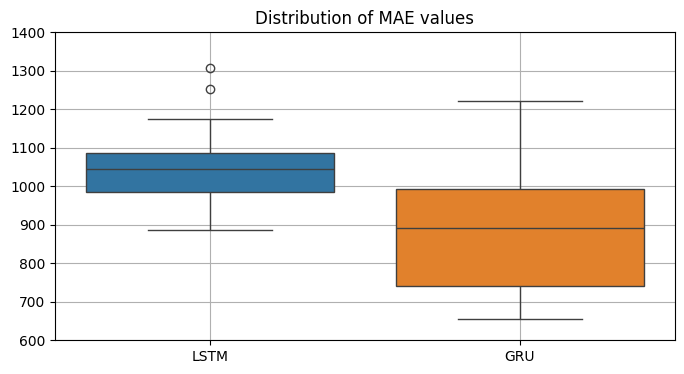

In [10]:
df = dataset[["LSTM-MAE", "GRU-MAE"]]
df.columns = ["LSTM", "GRU"]
boxplot(
  data=df, min=600, max=1400,
  title="Distribution of MAE values")

In [11]:
normality(dataset["LSTM-MAE"], dataset["GRU-MAE"])

Hasil Uji-Shapiro-Wilk
----------------------
Terima H0 = data terdistribusi normal
LSTM. p-value 0.31443116540893834

Terima H0 = data terdistribusi normal
GRU. p-value 0.0816158619967767

Hasil Uji-Anderson-Darling 
----------------------
Terima H0 = data terdistribusi normal
LSTM. p-value 0.34925868702157814

Terima H0 = data terdistribusi normal
GRU. p-value 0.6964302789772603



In [12]:
hypothesis(dataset["LSTM-MAE"], dataset["GRU-MAE"])

H1 = Ada perbedaan kinerja antara LSTM dan GRU
p-value 5.387622404564988e-06


### Hypothesis Test for RMSE Values

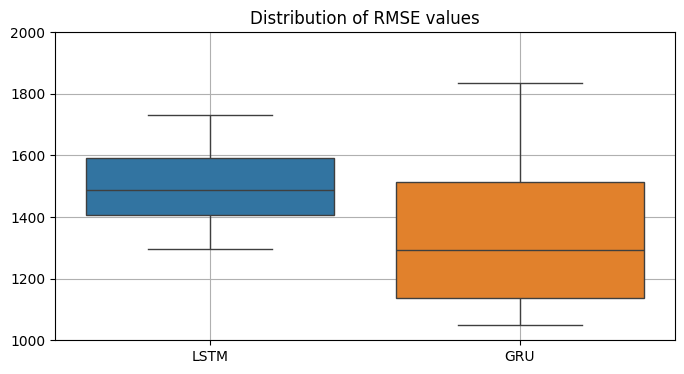

In [13]:
df = dataset[["LSTM-RMSE", "GRU-RMSE"]]
df.columns = ["LSTM", "GRU"]
boxplot(
  data=df, min=1000, max=2000,
  title="Distribution of RMSE values")

In [14]:
normality(dataset["LSTM-RMSE"], dataset["GRU-RMSE"])

Hasil Uji-Shapiro-Wilk
----------------------
Terima H0 = data terdistribusi normal
LSTM. p-value 0.3580345757159086

Terima H1 = data tidak terdistribusi normal
GRU. p-value 0.03260158870826751

Hasil Uji-Anderson-Darling 
----------------------
Terima H0 = data terdistribusi normal
LSTM. p-value 0.44155757852294997

Terima H0 = data terdistribusi normal
GRU. p-value 0.8177630379804484



In [15]:
hypothesis(dataset["LSTM-RMSE"], dataset["GRU-RMSE"])

H1 = Ada perbedaan kinerja antara LSTM dan GRU
p-value 0.0002710847669349555


### Hypothesis Test for MAPE Values

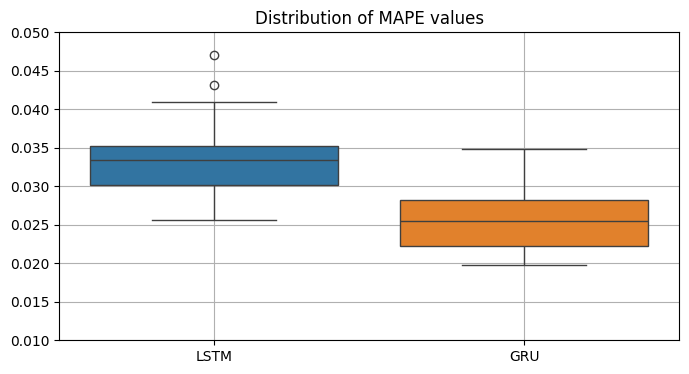

In [16]:
df = dataset[["LSTM-MAPE", "GRU-MAPE"]]
df.columns = ["LSTM", "GRU"]
boxplot(
  data=df, min=0.01, max=0.05,
  title="Distribution of MAPE values")

In [17]:
normality(dataset["LSTM-MAPE"], dataset["GRU-MAPE"])

Hasil Uji-Shapiro-Wilk
----------------------
Terima H0 = data terdistribusi normal
LSTM. p-value 0.18514901844017634

Terima H0 = data terdistribusi normal
GRU. p-value 0.20423989498640788

Hasil Uji-Anderson-Darling 
----------------------
Terima H0 = data terdistribusi normal
LSTM. p-value 0.42200779542558564

Terima H0 = data terdistribusi normal
GRU. p-value 0.45757032096165773



In [18]:
hypothesis(dataset["LSTM-MAPE"], dataset["GRU-MAPE"])

H1 = Ada perbedaan kinerja antara LSTM dan GRU
p-value 2.7981200379782854e-09


### Hypothesis Test for Time Values

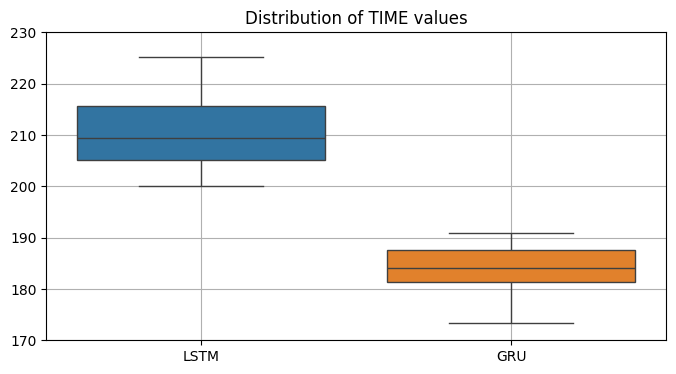

In [19]:
df = dataset[["LSTM-TIME", "GRU-TIME"]]
df.columns = ["LSTM", "GRU"]
boxplot(
  data=df, min=170, max=230,
  title="Distribution of TIME values")

In [20]:
normality(dataset["LSTM-TIME"], dataset["GRU-TIME"])

Hasil Uji-Shapiro-Wilk
----------------------
Terima H0 = data terdistribusi normal
LSTM. p-value 0.27647572295485023

Terima H0 = data terdistribusi normal
GRU. p-value 0.4118053663584862

Hasil Uji-Anderson-Darling 
----------------------
Terima H0 = data terdistribusi normal
LSTM. p-value 0.40516157236322314

Terima H0 = data terdistribusi normal
GRU. p-value 0.28951318225750455



In [21]:
hypothesis(dataset["LSTM-TIME"], dataset["GRU-TIME"])

H1 = Ada perbedaan kinerja antara LSTM dan GRU
p-value 5.893044529123843e-25
